In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = "StudentPerformanceFactors.csv"
df = pd.read_csv(data)

In [3]:
# Clean and explore the data
df.columns = df.columns.str.strip()
print("Dataset Preview:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing Values Check:")
print(df.isnull().sum())

Dataset Preview:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 

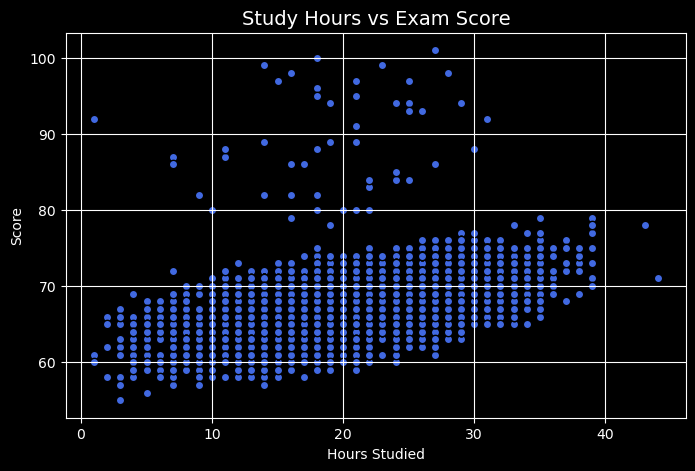

In [4]:
# Visualize the relationship between Hours & Scores
plt.figure(figsize=(8, 5))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='royalblue', edgecolors='black')
plt.title('Study Hours vs Exam Score', fontsize=14)
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [5]:
# Split the data into training and testing sets
X = df[['Hours_Studied']]  # Keep it 2D
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 5285
Testing samples: 1322


## Linear Regression Model

In [6]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Show the model equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"\n Model Equation: score = {slope:.2f} * hours + {intercept:.2f}")

# Step 8: Predict scores on the test set
y_pred = model.predict(X_test)


 Model Equation: score = 0.29 * hours + 61.51


In [8]:
# Compare actual vs predicted
results = pd.DataFrame({
    'Hours': X_test.values.flatten(),
    'Actual Score': y_test.values,
    'Predicted Score': y_pred
})
results = results.sort_values(by='Hours').reset_index(drop=True)
display(results)


,Hours,Actual Score,Predicted Score
0,2,66,62.082505
1,2,65,62.082505
2,2,65,62.082505
3,3,65,62.368174
4,3,55,62.368174
...,...,...,...
1317,37,73,72.080911
1318,38,74,72.366580
1319,39,73,72.652249
1320,39,77,72.652249


In [9]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

Mean Squared Error (MSE): 10.86
R-squared Score (R²): 0.23


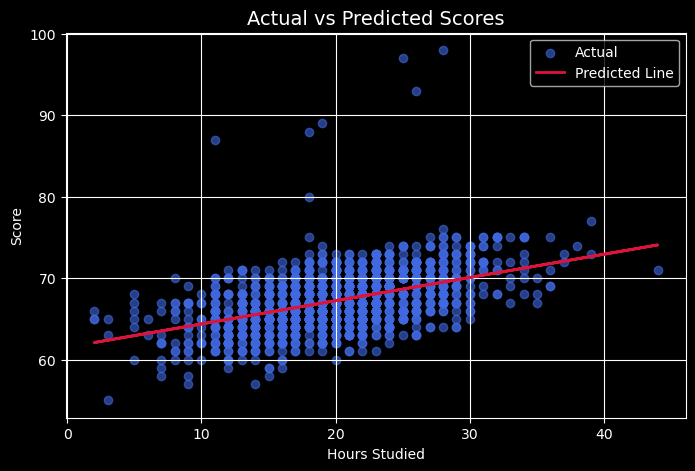

In [10]:
# Visualize actual vs predicted scores
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='royalblue', label='Actual', alpha=0.6)
plt.plot(X_test, y_pred, color='crimson', linewidth=2, label='Predicted Line')
plt.title('Actual vs Predicted Scores', fontsize=14)
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

## Polynomial Regression Model


In [11]:
# Transform input features into polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X) 

In [12]:
# Split polynomial features into train and test sets
X_poly_train, X_poly_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42)

In [13]:
# Train a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions
y_poly_pred = poly_model.predict(X_poly_test)


In [14]:
# Evaluate model performance
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"\n Polynomial Regression (degree=2) Evaluation:")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R-squared Score: {r2_poly:.2f}")


 Polynomial Regression (degree=2) Evaluation:
Mean Squared Error: 10.84
R-squared Score: 0.23


g:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


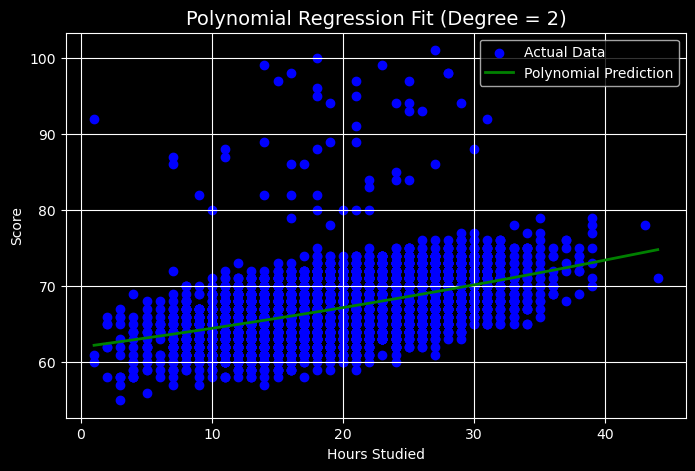

In [15]:
# Visualize the curve of polynomial regression

# Sort the X values for a smooth line
X_sorted = np.sort(X.values, axis=0)
X_sorted_poly = poly.transform(X_sorted)
y_poly_line = poly_model.predict(X_sorted_poly)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_sorted, y_poly_line, color='green', linewidth=2, label='Polynomial Prediction')
plt.title('Polynomial Regression Fit (Degree = 2)', fontsize=14)
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()